In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
pd.set_option('display.max_rows', 500)
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#sns.scatterplot(data=df, x="avg_rent", y="gini_index")

In [3]:
df = pd.read_csv('cali_2011_2018.csv')

In [16]:
df

,Date,RegionName,RegionID,SizeRank,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,2011,90001,95982,2805,659055.0,309.0,19.0,0.0,59.0,0.0,...,1094.0,396.0,129.0,566.0,40379.0,0.0,0.0,465.0,426.0,20883.0
1,2011,90002,95983,3285,442220.0,70.0,20.0,0.0,65.0,5.0,...,988.0,202.0,207.0,215.0,28035.0,37.0,1.0,345.0,412.0,15560.0
2,2011,90003,95984,1267,702530.0,480.0,236.0,17.0,115.0,39.0,...,1331.0,410.0,170.0,304.0,31870.0,49.0,6.0,765.0,857.0,22259.0
3,2011,90004,95985,245,992580.0,322.0,76.0,36.0,17309.0,1199.0,...,1490.0,937.0,20.0,576.0,23007.0,984.0,685.0,10641.0,1918.0,33039.0
4,2011,90005,95986,1253,681580.0,342.0,109.0,17.0,12845.0,1117.0,...,1150.0,867.0,120.0,1129.0,10152.0,194.0,158.0,2925.0,1114.0,21411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,2018,96145,98660,10322,NaN,NaN,16.0,0.0,NaN,0.0,...,3791.0,18.0,77.0,22.0,NaN,155.0,156.0,1944.0,180.0,1173.0
9268,2018,96146,98661,13051,NaN,NaN,0.0,0.0,NaN,0.0,...,1490.0,12.0,35.0,30.0,NaN,112.0,78.0,945.0,76.0,594.0
9269,2018,96148,98662,13169,NaN,NaN,0.0,0.0,NaN,0.0,...,415.0,9.0,9.0,19.0,NaN,12.0,34.0,355.0,0.0,386.0
9270,2018,96150,98663,5399,229355.0,NaN,61.0,88.0,NaN,46.0,...,12377.0,286.0,162.0,897.0,NaN,1125.0,1974.0,20201.0,1307.0,14830.0


In [25]:
df.isna().sum().sort_values(ascending=False).head(39).keys()

Index(['pop_separated', 'pop_now_married', 'pop_15_and_over', 'pop_widowed',
       'pop_never_married', 'pop_divorced', 'speak_only_english_at_home',
       'speak_spanish_at_home', 'speak_spanish_at_home_low_english',
       'pop_5_years_over', 'one_year_more_college', 'commute_40_44_mins',
       'commute_35_39_mins', 'high_school_diploma', 'commute_60_89_mins',
       'less_one_year_college', 'commute_90_more_mins', 'pop_25_years_over',
       'amerindian_including_hispanic', 'households_retirement_income',
       'black_including_hispanic', 'commute_5_9_mins', 'bachelors_degree',
       'associates_degree', 'male_60_61', 'male_62_64',
       'white_including_hispanic', 'asian_including_hispanic',
       'masters_degree', 'aggregate_travel_time_to_work', 'avg_rent',
       'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_lower_value_quartile',
       'percent_income_spent_on_rent', 'median_year_structure_built

In [80]:
df2 = df.drop(columns=['pop_separated', 'pop_now_married', 'pop_15_and_over', 'pop_widowed',
       'pop_never_married', 'pop_divorced', 'speak_only_english_at_home',
       'speak_spanish_at_home', 'speak_spanish_at_home_low_english',
       'pop_5_years_over', 'one_year_more_college', 'commute_40_44_mins',
       'commute_35_39_mins', 'high_school_diploma', 'commute_60_89_mins',
       'less_one_year_college', 'commute_90_more_mins', 'pop_25_years_over',
       'amerindian_including_hispanic', 'households_retirement_income',
       'black_including_hispanic', 'commute_5_9_mins', 'bachelors_degree',
       'associates_degree', 'male_60_61', 'male_62_64',
       'white_including_hispanic', 'asian_including_hispanic',
       'masters_degree', 'aggregate_travel_time_to_work', #'avg_rent',
       'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'owner_occupied_housing_units_lower_value_quartile',
       'percent_income_spent_on_rent', 'median_year_structure_built',
       'median_income', 'owner_occupied_housing_units_upper_value_quartile',
       'owner_occupied_housing_units_median_value'])

In [48]:
df2.isna().sum().sort_values(ascending=False)

avg_rent                                                          128
income_100000_124999                                                8
male_67_to_69                                                       8
male_45_64_grade_9_12                                               8
male_45_64_graduate_degree                                          8
male_45_64_high_school                                              8
male_45_64_less_than_9_grade                                        8
male_45_64_some_college                                             8
male_45_to_49                                                       8
male_45_to_64                                                       8
male_50_to_54                                                       8
male_55_to_59                                                       8
male_5_to_9                                                         8
male_65_to_66                                                       8
male_70_to_74       

In [83]:
df2 = df2.dropna()

In [51]:
list(df2.columns)

['Date',
 'RegionName',
 'RegionID',
 'SizeRank',
 'amerindian_pop',
 'armed_forces',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'avg_rent',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_44_mins',
 'commute_45_59_mins',
 'commute_60_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
 'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_uni

In [84]:
X = df2.drop(columns=['RegionName', 'RegionID', 'avg_rent'])
y = df2.avg_rent

<AxesSubplot:xlabel='log_rent', ylabel='median_rent'>

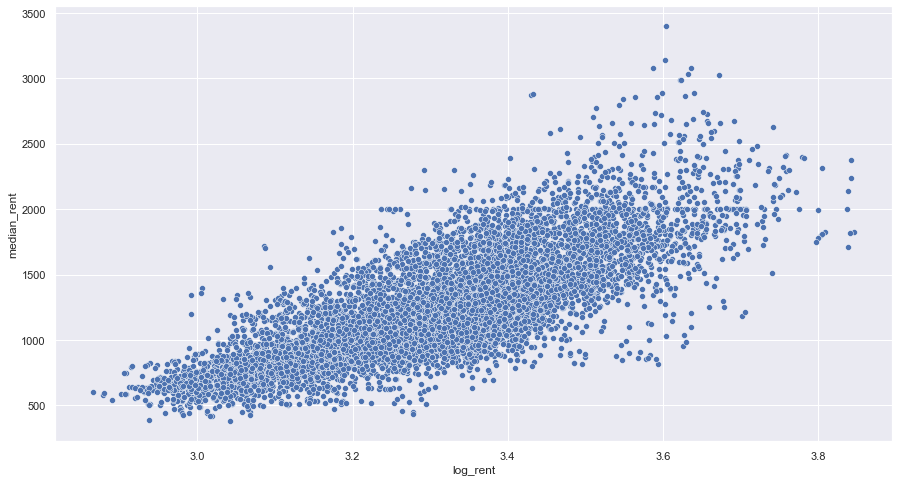

In [75]:
#Check for outliers
sns.scatterplot(data=df2, x="log_rent", y="median_rent")

In [69]:
mlr = LinearRegression()
mlr_log = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, np.log10(y), test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_log.append(mlr.score(X_test, y_test))

In [103]:
mlr = LinearRegression()
mlr_nodate = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='Date'), y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_nodate.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

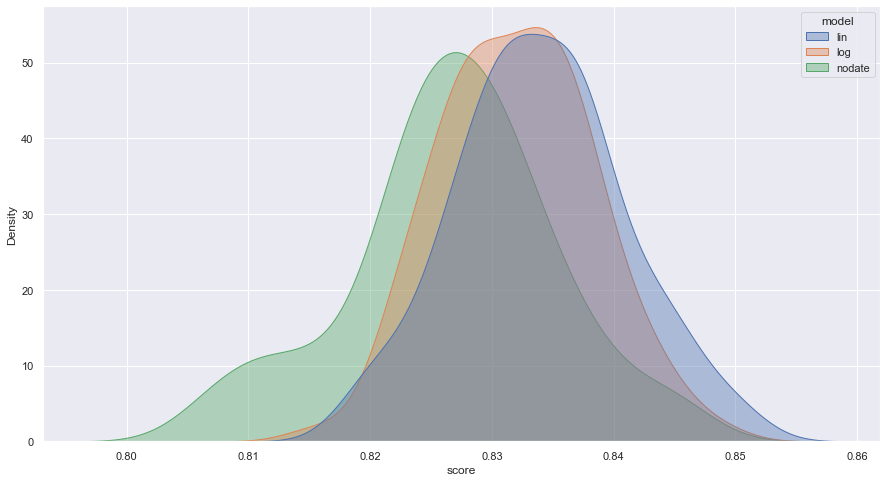

In [105]:
scores = pd.concat([pd.DataFrame({'score':mlr_lin,'model':'lin'}),
                    pd.DataFrame({'score':mlr_log,'model':'log'}),
                    pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [74]:
df2['log_rent'] = np.log10(df2['avg_rent'])

<AxesSubplot:xlabel='avg_rent', ylabel='Density'>

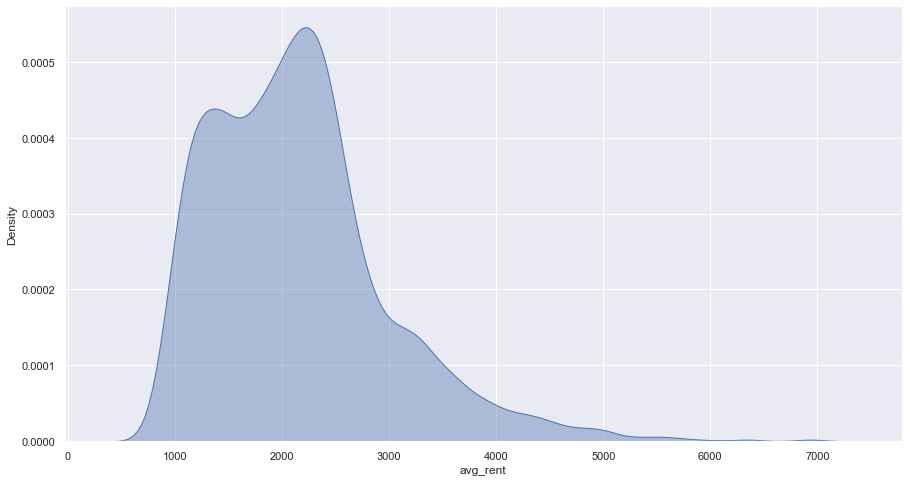

In [67]:
sns.kdeplot(data=df2, x="avg_rent", fill=True, common_norm=False, alpha=0.4)
#sns.kdeplot(data=df2, x="log_rent", fill=True, common_norm=False, alpha=0.4)

<AxesSubplot:xlabel='log_rent', ylabel='Density'>

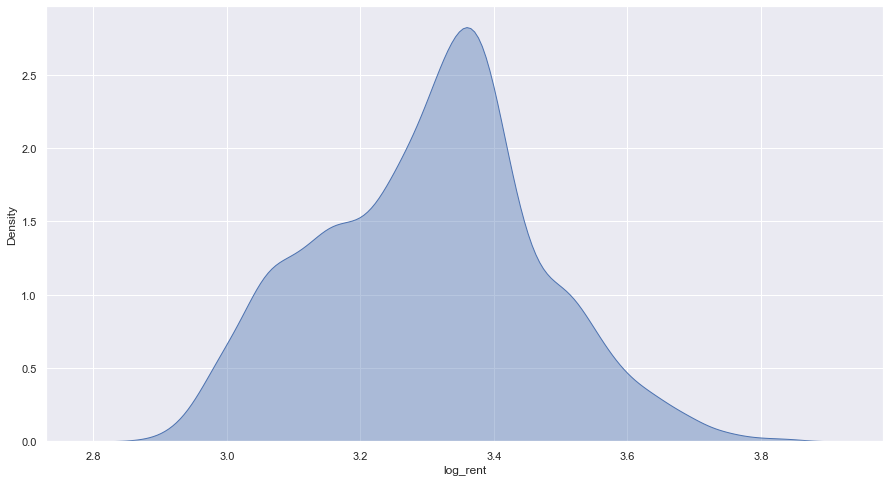

In [68]:
sns.kdeplot(data=df2, x="log_rent", fill=True, common_norm=False, alpha=0.4)

In [79]:
list(X.columns)

['Date',
 'SizeRank',
 'amerindian_pop',
 'armed_forces',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_44_mins',
 'commute_45_59_mins',
 'commute_60_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
 'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_units',
 'dwellings_50_or_more_units',
 'dwe

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Date', 'gini_index']), y, test_size=0.25)
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.05,0.55,41)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

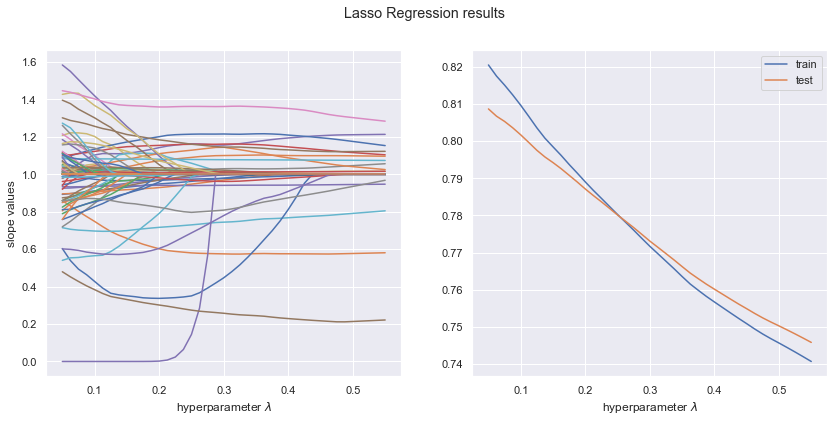

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [129]:
coefs_lasso.loc[.2,coefs_lasso.loc[.2,:] != 0].sort_values(ascending=False)

walked_to_work                                                    0.133339
commute_45_59_mins                                                0.079417
employed_information                                              0.073282
dwellings_1_units_attached                                        0.062260
asian_male_55_64                                                  0.057736
employed_arts_entertainment_recreation_accommodation_food         0.045259
black_male_55_64                                                  0.045109
male_85_and_over                                                  0.044451
female_65_to_66                                                   0.040260
income_per_capita                                                 0.033522
employed_science_management_admin_waste                           0.030454
occupation_services                                               0.030083
female_67_to_69                                                   0.021661
group_quarters           

# Lagging the dataframe

In [133]:
df2[['Date', 'RegionName', 'avg_rent']]
# Let's make a new column called rent_in_1year

,Date,RegionName,avg_rent
0,2011,90001,1706.083333
1,2011,90002,1778.083333
2,2011,90003,1629.833333
3,2011,90004,2257.833333
4,2011,90005,2213.500000
...,...,...,...
9267,2018,96145,2942.000000
9268,2018,96146,2375.111111
9269,2018,96148,2276.583333
9270,2018,96150,1946.750000


In [205]:
df3 = df2.copy()
df3 = df3.reset_index().drop(columns='index')
df3[['Date', 'RegionName', 'avg_rent']]

,Date,RegionName,avg_rent
0,2011,90001,1706.083333
1,2011,90002,1778.083333
2,2011,90003,1629.833333
3,2011,90004,2257.833333
4,2011,90005,2213.500000
...,...,...,...
9139,2018,96145,2942.000000
9140,2018,96146,2375.111111
9141,2018,96148,2276.583333
9142,2018,96150,1946.750000


In [212]:
# Let's make a new column called rent_in_1year
for i in range(df3.shape[0]):
    row_date = df3.loc[i, 'Date']
    row_zip = df3.loc[i, 'RegionName']
    row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
    if row.shape[0] == 1:
        df3.loc[i, 'rent_in_1year'] = float(row.avg_rent)

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = (df3[df3['RegionName'] == row_zip])[df3['Date'] == (row_date+1)]
/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/3943053691.py:5:

In [213]:
df3

,Date,RegionName,RegionID,SizeRank,amerindian_pop,armed_forces,asian_male_45_54,asian_male_55_64,asian_pop,avg_rent,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,rent_in_1year
0,2011,90001,95982,2805,19.0,0.0,0.0,0.0,48.0,1706.083333,...,1094.0,396.0,129.0,566.0,0.0,0.0,465.0,426.0,20883.0,1635.166667
1,2011,90002,95983,3285,20.0,0.0,5.0,0.0,65.0,1778.083333,...,988.0,202.0,207.0,215.0,37.0,1.0,345.0,412.0,15560.0,1715.000000
2,2011,90003,95984,1267,236.0,17.0,39.0,0.0,115.0,1629.833333,...,1331.0,410.0,170.0,304.0,49.0,6.0,765.0,857.0,22259.0,1599.000000
3,2011,90004,95985,245,76.0,36.0,1199.0,1085.0,17154.0,2257.833333,...,1490.0,937.0,20.0,576.0,984.0,685.0,10641.0,1918.0,33039.0,2218.166667
4,2011,90005,95986,1253,109.0,17.0,1117.0,703.0,12739.0,2213.500000,...,1150.0,867.0,120.0,1129.0,194.0,158.0,2925.0,1114.0,21411.0,2220.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,2018,96145,98660,10322,16.0,0.0,0.0,0.0,0.0,2942.000000,...,3791.0,18.0,77.0,22.0,155.0,156.0,1944.0,180.0,1173.0,NaN
9140,2018,96146,98661,13051,0.0,0.0,0.0,0.0,0.0,2375.111111,...,1490.0,12.0,35.0,30.0,112.0,78.0,945.0,76.0,594.0,NaN
9141,2018,96148,98662,13169,0.0,0.0,0.0,0.0,0.0,2276.583333,...,415.0,9.0,9.0,19.0,12.0,34.0,355.0,0.0,386.0,NaN
9142,2018,96150,98663,5399,61.0,88.0,46.0,66.0,1352.0,1946.750000,...,12377.0,286.0,162.0,897.0,1125.0,1974.0,20201.0,1307.0,14830.0,NaN


In [171]:
#df3[df3['Date'] == 2012 & 
(df3[df3['RegionName'] == 90001])[df3['Date'] == 2011]

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_1298/1437101320.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df3[df3['RegionName'] == 90001])[df3['Date'] == 2011]


,Date,RegionName,RegionID,SizeRank,amerindian_pop,armed_forces,asian_male_45_54,asian_male_55_64,asian_pop,avg_rent,...,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,2011,90001,95982,2805,19.0,0.0,0.0,0.0,48.0,1706.083333,...,2350.0,1094.0,396.0,129.0,566.0,0.0,0.0,465.0,426.0,20883.0


In [174]:
df3[df3['RegionName'] == 90001]

,Date,RegionName,RegionID,SizeRank,amerindian_pop,armed_forces,asian_male_45_54,asian_male_55_64,asian_pop,avg_rent,...,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,2011,90001,95982,2805,19.0,0.0,0.0,0.0,48.0,1706.083333,...,2350.0,1094.0,396.0,129.0,566.0,0.0,0.0,465.0,426.0,20883.0
1130,2012,90001,95982,2805,33.0,0.0,0.0,0.0,74.0,1635.166667,...,2449.0,987.0,420.0,88.0,510.0,15.0,0.0,535.0,436.0,20212.0
2263,2013,90001,95982,2805,28.0,0.0,2.0,0.0,70.0,1724.333333,...,2911.0,918.0,298.0,45.0,534.0,19.0,4.0,471.0,380.0,20391.0
3398,2014,90001,95982,2805,17.0,0.0,3.0,5.0,74.0,1825.000000,...,3179.0,841.0,280.0,49.0,495.0,17.0,5.0,390.0,445.0,20773.0
4539,2015,90001,95982,2805,18.0,0.0,3.0,11.0,88.0,2049.500000,...,3172.0,726.0,223.0,46.0,595.0,17.0,15.0,353.0,499.0,21256.0
5690,2016,90001,95982,2805,18.0,0.0,4.0,11.0,93.0,2165.833333,...,3165.0,641.0,172.0,28.0,609.0,15.0,26.0,435.0,491.0,21998.0
6841,2017,90001,95982,2805,12.0,0.0,4.0,12.0,88.0,2281.666667,...,2922.0,631.0,178.0,13.0,681.0,0.0,27.0,351.0,502.0,22698.0
7992,2018,90001,95982,2805,37.0,4.0,4.0,12.0,67.0,2317.250000,...,2550.0,479.0,164.0,26.0,710.0,12.0,24.0,413.0,602.0,23188.0


In [211]:
float(df3.loc[0, :].avg_rent)

1706.083333

In [197]:
bool(np.NaN)

True

In [206]:
df3.isna().sum().sort_values(ascending=False).head(20)

Date                            0
male_67_to_69                   0
male_45_64_grade_9_12           0
male_45_64_graduate_degree      0
male_45_64_high_school          0
male_45_64_less_than_9_grade    0
male_45_64_some_college         0
male_45_to_49                   0
male_45_to_64                   0
male_50_to_54                   0
male_55_to_59                   0
male_5_to_9                     0
male_65_to_66                   0
male_70_to_74                   0
income_10000_14999              0
male_75_to_79                   0
male_80_to_84                   0
male_85_and_over                0
male_male_households            0
male_pop                        0
dtype: int64

In [219]:
lst = [1, 2, 3, 3]
lst.index(1)

0